# Hotel Demand Forecasting - Analysis

- Load time series data and look at its characteristics
- Determine autocorrelation, seasonality, stationarity .. lag plot, ACF plot, ADF test, Differencing
- Decomposition, 
- residuals plots?

- OLS Regression
- xxxxxxxx
 


## Libraries, Utility Functions

In [6]:
# Libraries
#

import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt
plt.style.use('ggplot') 
from pandas.plotting import lag_plot



In [2]:
# Establish valid data file path, for reading and saving eg CSV files
#

import os
data_directory = 'Data_Sources'          # Designated data folder above the current working directory
project_directory = os.path.dirname(os.getcwd())
DATA_PATH = os.path.join(project_directory, data_directory)
if not os.path.isdir(DATA_PATH):
    raise Exception(f'Directory not found: {DATA_PATH}')

del data_directory, project_directory

In [3]:
# A simple utility function to obtain and summarise key elements of a given dataframe

def print_file_summary(data_frame):
    # Create a temporary df and ensure no lists remain, so that unique items can be identified for uniqueness
    temp_df = data_frame.copy()
    temp_df = temp_df.map(lambda cell: str(cell) if isinstance(cell, list) else cell)
    
    # Calculate Data Types 
    summary_of_df = pd.DataFrame({'Count': data_frame.count(),
                                 'Missing': data_frame.isnull().sum(), 'Empty': 0,
                                 'Unique': temp_df.nunique(),
                                 'Type': data_frame.dtypes, 
                                 'String': 0, 'Int': 0, 'Float': 0, 'List': 0
                                 })
    summary_of_df['Empty'] = (data_frame == '').sum()
    summary_of_df['String'] = data_frame.map(lambda cell: isinstance(cell, str)).sum()
    summary_of_df['Int'] = data_frame.map(lambda cell: isinstance(cell, int)).sum()
    summary_of_df['Float'] = data_frame.map(lambda cell: isinstance(cell, float)).sum()
    summary_of_df['List'] = data_frame.map(lambda cell: isinstance(cell, list)).sum()

    display(summary_of_df)

## Load time series files and explore their characteristics


In [4]:
# Load the time series CSV

# Load the states .csv file, exit if do not exist or are invalid
file_name = 'hotel_timeseries.csv'
file_path = os.path.join(DATA_PATH, file_name)
if not os.path.isfile(file_path):
    raise Exception(f'File not found: {file_path}')
hotel_time_series_df = pd.read_csv(file_path, parse_dates=['Date'])
hotel_time_series_df.set_index('Date', inplace=True)

# Look at the data file 
display(f'Summary of the Loaded File: {file_name}')
display(hotel_time_series_df.head(3))
print_file_summary(hotel_time_series_df)

# Tidy Up
del file_name, file_path


'Summary of the Loaded File: hotel_timeseries.csv'

,Standard_OCC,Standard_Capacity,Standard_Rate,Premium_OCC,Premium_Capacity,Premium_Rate
Date,,,,,,
2020-01-01,129,254,325,65,100,575
2020-01-02,126,254,325,53,100,575
2020-01-03,137,254,325,63,100,575


,Count,Missing,Empty,Unique,Type,String,Int,Float,List
Standard_OCC,1461,0,0,177,int64,0,1461,0,0
Standard_Capacity,1461,0,0,1,int64,0,1461,0,0
Standard_Rate,1461,0,0,1,int64,0,1461,0,0
Premium_OCC,1461,0,0,101,int64,0,1461,0,0
Premium_Capacity,1461,0,0,1,int64,0,1461,0,0
Premium_Rate,1461,0,0,1,int64,0,1461,0,0


- Add some means, ranges, sd for rooms?

# Examine Autocorrelation, Seasonality, Stationarity




- Determine autocorrelation, seasonality, stationarity .. lag plot, ACF plot, ADF test, Differencing
- Decomposition, 
- residuals plots?

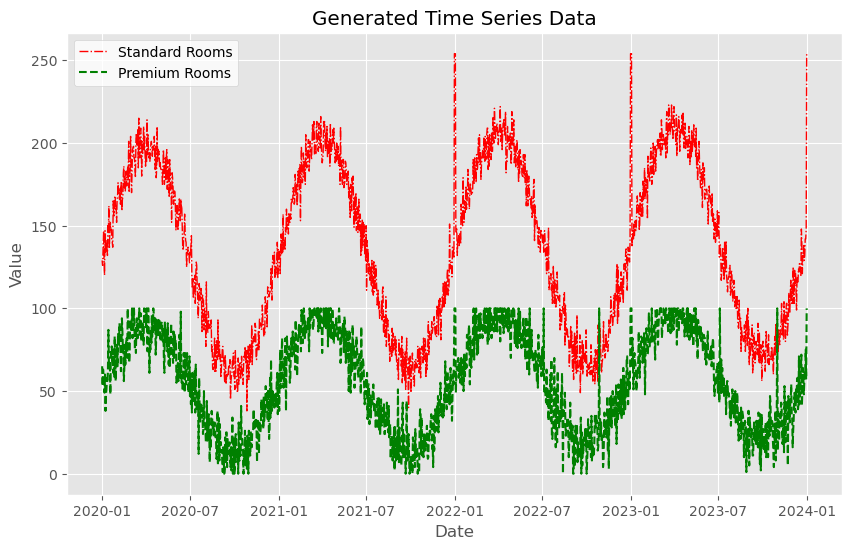

In [5]:
# Plot the occupancy time series data
fig, ax = plt.subplots(figsize = (10,6))
ax.set_title(f'Generated Time Series Data')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
# Two line plots
ax.plot(hotel_time_series_df.index, hotel_time_series_df['Standard_OCC'], linestyle='-.', color='red', linewidth=1, label='Standard Rooms')
ax.plot(hotel_time_series_df.index, hotel_time_series_df['Premium_OCC'], 'g--', label='Premium Rooms')
# Legend
ax.legend(loc='upper left', facecolor='white')
plt.show()


- Shows definite annual seasonality with peak high and low seasons
- Also some infrequent spikes in bookings
- Possibly a small upward tend over time
- Premium rooms hit max and zero bookings several times ...

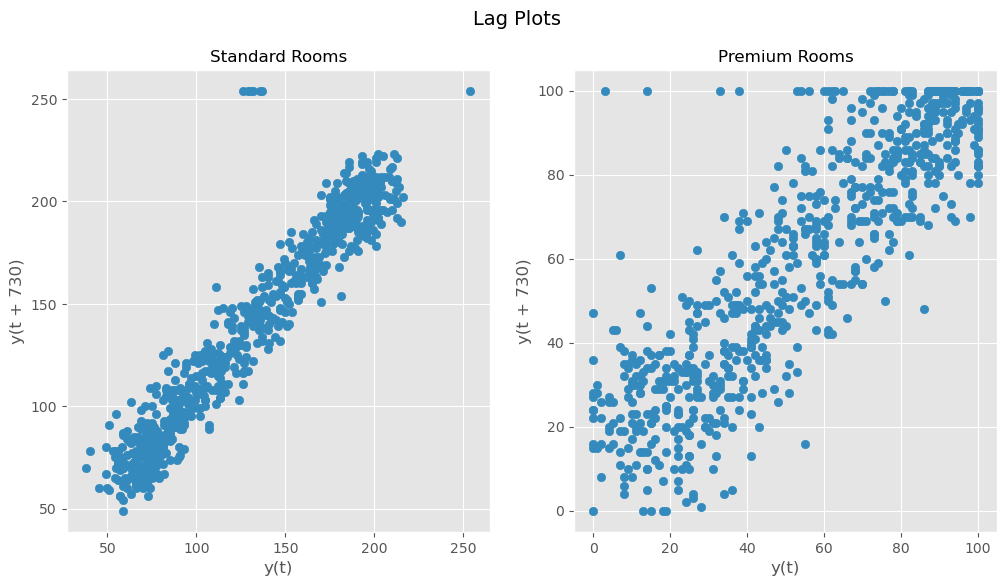

In [17]:
# Lag plot - is there evidence of autocorrelation?

lag_value = 730

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
fig.suptitle('Lag Plots', fontsize=14)

ax1.set_title('Standard Rooms', fontsize=12)
lag_plot(hotel_time_series_df['Standard_OCC'], lag=lag_value, ax=ax1)
ax2.set_title('Premium Rooms', fontsize=12)
lag_plot(hotel_time_series_df['Premium_OCC'], lag=lag_value, ax=ax2)

plt.show()



- Both categories of room show definite autocorrelation 
- Premium rooms bunched up at max value and autocorrelation may be slight less strong
- Some outliers when rooms are fully booked

In [ ]:
# ACF plot  - is there evidence of seasonality?

lag_value = 730



l
fig, ax = plt.subplots(figsize = (10,6))
plot_acf(test_df, lags=lag_value, ax=ax)
plt.show()